In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('/content/bitcoin_dataset.csv')

In [3]:
data.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [4]:
data.columns

Index(['Date', 'btc_market_price', 'btc_total_bitcoins', 'btc_market_cap',
       'btc_trade_volume', 'btc_blocks_size', 'btc_avg_block_size',
       'btc_n_orphaned_blocks', 'btc_n_transactions_per_block',
       'btc_median_confirmation_time', 'btc_hash_rate', 'btc_difficulty',
       'btc_miners_revenue', 'btc_transaction_fees',
       'btc_cost_per_transaction_percent', 'btc_cost_per_transaction',
       'btc_n_unique_addresses', 'btc_n_transactions',
       'btc_n_transactions_total', 'btc_n_transactions_excluding_popular',
       'btc_n_transactions_excluding_chains_longer_than_100',
       'btc_output_volume', 'btc_estimated_transaction_volume',
       'btc_estimated_transaction_volume_usd'],
      dtype='object')

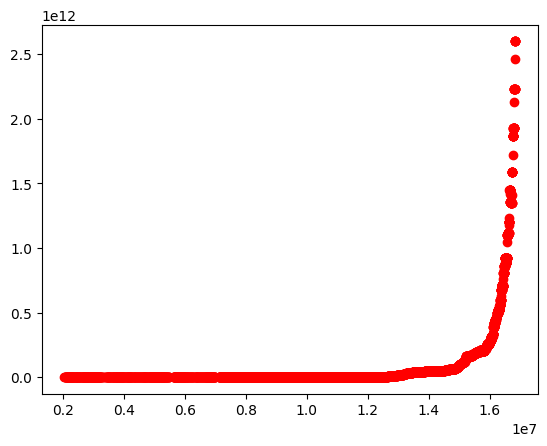

In [5]:
x=data['btc_total_bitcoins']
y=data['btc_difficulty']
plt.scatter(x,y,color='red')

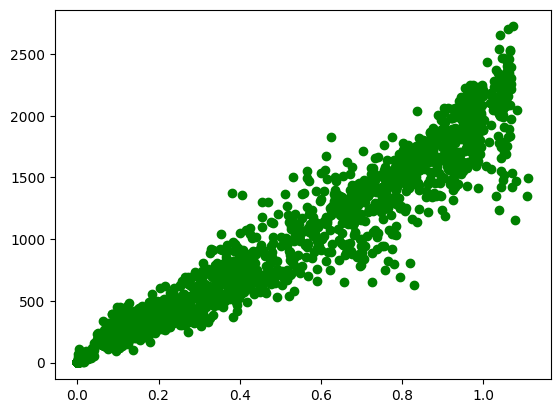

In [6]:
plt.scatter(x=data['btc_avg_block_size'],y=data['btc_n_transactions_per_block'], color='green')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Date                                                 2906 non-null   object 
 1   btc_market_price                                     2906 non-null   float64
 2   btc_total_bitcoins                                   2879 non-null   float64
 3   btc_market_cap                                       2906 non-null   float64
 4   btc_trade_volume                                     2885 non-null   float64
 5   btc_blocks_size                                      2877 non-null   float64
 6   btc_avg_block_size                                   2906 non-null   float64
 7   btc_n_orphaned_blocks                                2906 non-null   int64  
 8   btc_n_transactions_per_block                         2906 non-null  

In [8]:
data.describe()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
count,2906.000000,2.879000e+03,2.906000e+03,2.885000e+03,2877.000000,2906.000000,2906.000000,2906.000000,2894.000000,2.906000e+03,...,2906.000000,2906.000000,2.906000e+03,2906.000000,2.906000e+03,2906.000000,2906.000000,2.906000e+03,2.906000e+03,2.906000e+03
mean,839.104218,1.151138e+07,1.344352e+10,7.398381e+07,35505.502848,0.350366,0.364074,671.673651,7.501113,1.244070e+06,...,66.747821,14.639125,1.937861e+05,102081.138334,6.844558e+07,94348.852374,63140.320028,1.566216e+06,2.036475e+05,2.024338e+08
std,2304.972497,4.200024e+06,3.866841e+10,2.924228e+08,43618.633821,0.353168,0.842259,689.561322,4.974549,2.924141e+06,...,1761.894646,20.536083,2.089146e+05,103896.929350,8.285341e+07,103966.111763,69687.052174,2.278910e+06,2.682781e+05,5.800513e+08
min,0.000000,2.043200e+06,0.000000e+00,0.000000e+00,0.000000,0.000216,0.000000,1.000000,0.000000,2.250000e-05,...,0.136531,0.000000,1.100000e+02,118.000000,4.124000e+04,118.000000,118.000000,6.150000e+03,7.000000e+00,0.000000e+00
25%,6.653465,8.485300e+06,5.363081e+07,2.916456e+05,781.000000,0.024177,0.000000,54.000000,6.066667,1.160880e+01,...,1.181945,4.156470,1.675475e+04,8025.250000,2.413376e+06,6813.500000,6765.500000,4.901712e+05,9.600325e+04,9.581680e+05
50%,235.130000,1.243115e+07,3.346869e+09,1.001414e+07,15183.000000,0.196022,0.000000,375.000000,7.916667,2.176189e+04,...,2.493564,7.822430,1.304450e+05,62337.000000,3.255271e+07,53483.000000,35283.500000,1.105205e+06,1.784685e+05,3.742576e+07
75%,594.191164,1.520051e+07,8.075525e+09,2.834038e+07,58293.000000,0.676065,0.000000,1232.995223,10.208333,1.035363e+06,...,5.915591,14.800589,3.603765e+05,190471.250000,1.080663e+08,185901.750000,113793.250000,2.031654e+06,2.588046e+05,1.312499e+08
max,19498.683330,1.683769e+07,3.270000e+11,5.352016e+09,154444.590300,1.110327,7.000000,2722.625000,47.733333,2.160975e+07,...,88571.428570,161.686071,1.072861e+06,490644.000000,2.966888e+08,470650.000000,318896.000000,4.599222e+07,5.825066e+06,5.760245e+09


In [9]:
num_missing = data.isnull().sum()

Text(0.5, 1.0, 'btc_blocks_size')

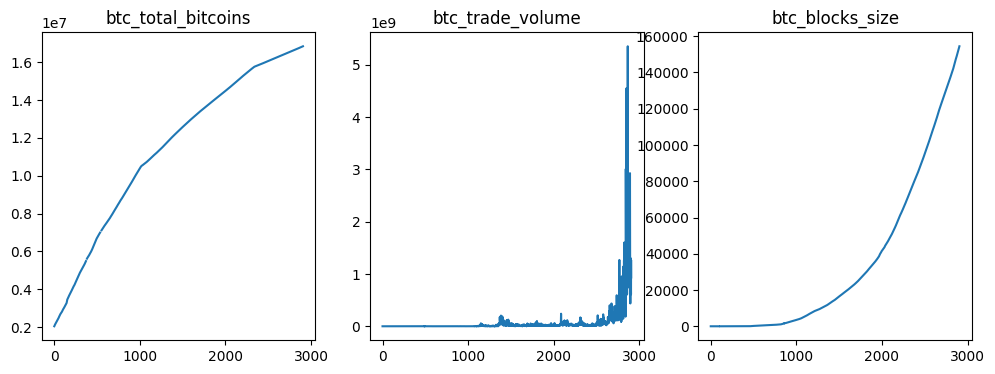

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(data['btc_total_bitcoins'])
axes[0].set_title("btc_total_bitcoins")

axes[1].plot(data['btc_trade_volume'])
axes[1].set_title("btc_trade_volume")

axes[2].plot(data['btc_blocks_size'])
axes[2].set_title("btc_blocks_size")

Text(0.5, 1.0, 'btc_transaction_fees')

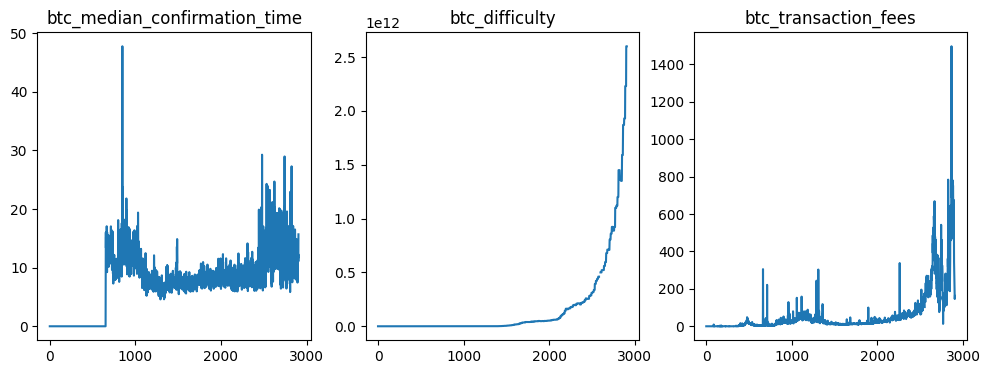

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(data['btc_median_confirmation_time'])
axes[0].set_title("btc_median_confirmation_time")

axes[1].plot(data['btc_difficulty'])
axes[1].set_title("btc_difficulty")

axes[2].plot(data['btc_transaction_fees'])
axes[2].set_title("btc_transaction_fees")

In [12]:
data_new = data.fillna(method='ffill')

<ipython-input-13-044734a49f72>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_new.corr(), annot=True)


<Axes: >

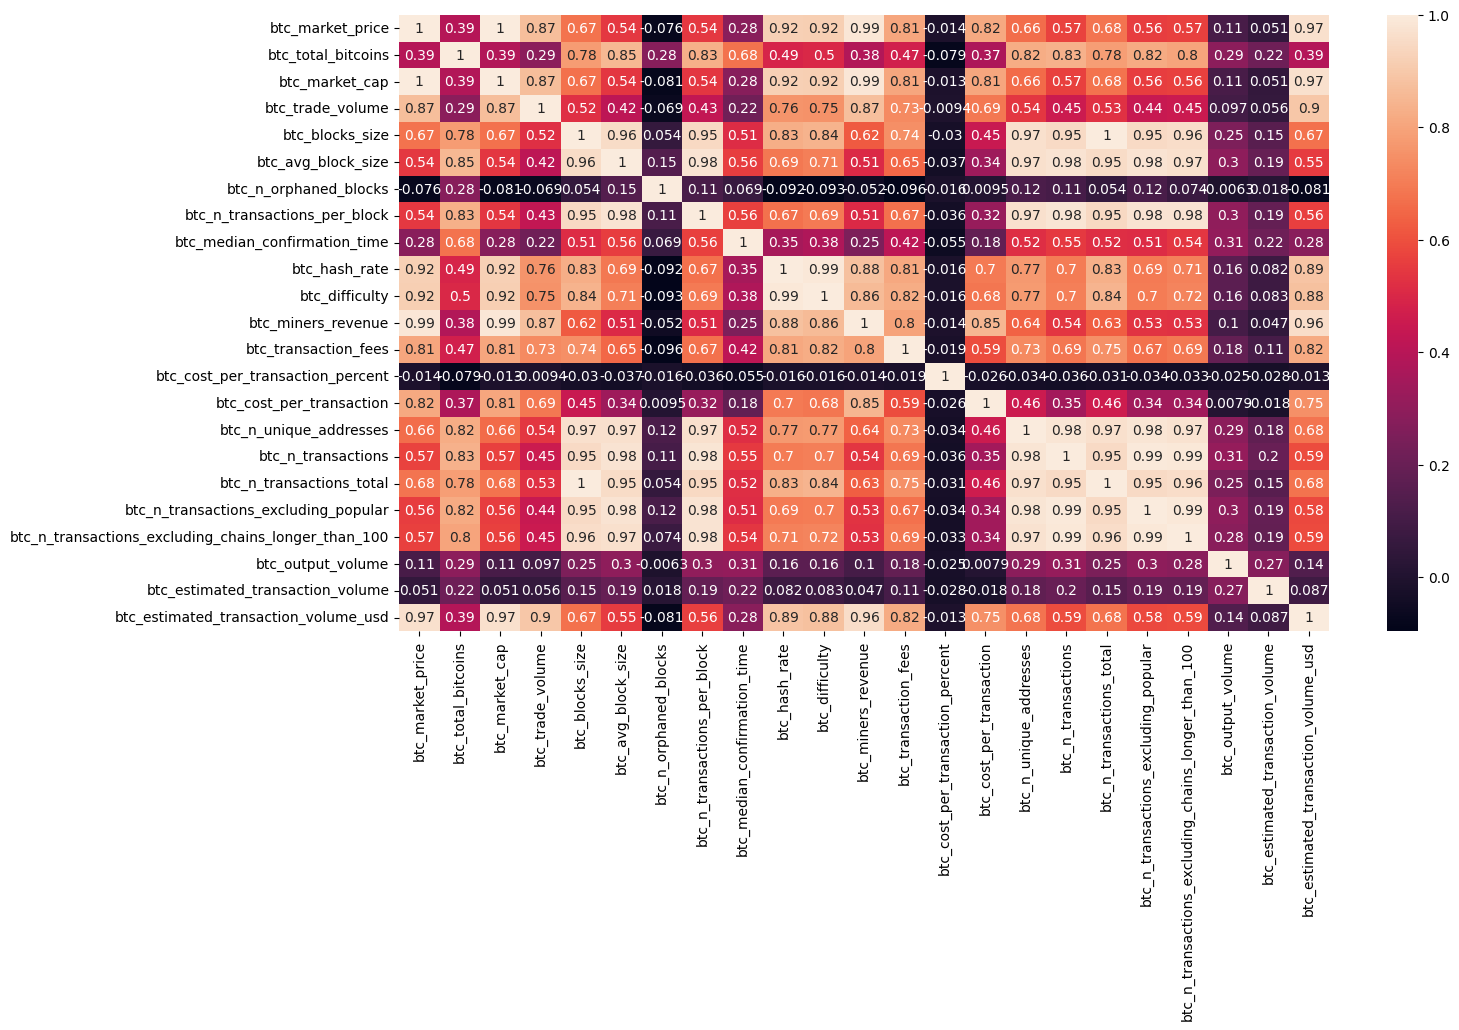

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(data_new.corr(), annot=True)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X = data_new.drop(['Date','btc_market_price'], axis =1)
y = data_new['btc_market_price']

from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state = 20)

X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)



Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
lr = LinearRegression()

lr.fit(X_train, y_train)
print('Train score: {}'.format(lr.score(X_train, y_train)))
print('Test score: {}'.format(lr.score(X_test,y_test)))
y_pred=lr.predict(X_test)
print('Mean Absolute error score: {}'.format(mean_absolute_error(y_test,y_pred)))

Train score: 0.9999539378804362
Test score: 0.9999606200442933
Mean Absolute error score: 9.83714769098402


Ridge Regression

In [23]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
print('Train score: {}'.format(ridge.score(X_train, y_train)))
print('Test score: {}'.format(ridge.score(X_test,y_test)))
y_pred=ridge.predict(X_test)
print('Mean Absolute error score: {}'.format(mean_absolute_error(y_test,y_pred)))

Train score: 0.9965513756246261
Test score: 0.9943231626453232
Mean Absolute error score: 69.96466842485498


SVM

In [24]:
from sklearn.svm import SVR
svr = SVR(kernel = 'linear')
svr.fit(X_train, y_train)
print('Train score: {}'.format(svr.score(X_train, y_train)))
print('Test score: {}\n'.format(svr.score(X_test,y_test)))
y_pred=svr.predict(X_test)
print('Mean Absolute error score: {}'.format(mean_absolute_error(y_test,y_pred)))

Train score: 0.13660060536688756
Test score: 0.13141827020835384

Mean Absolute error score: 627.7010802436747


Random Forest Regression Model

In [25]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=10,random_state=0)
rfr.fit(X_train,y_train)
print('Train score: {}'.format(rfr.score(X_train, y_train)))
print('Test score: {}\n'.format(rfr.score(X_test,y_test)))
y_pred=rfr.predict(X_test)
print('Mean Absolute error score: {}'.format(mean_absolute_error(y_test,y_pred)))

Train score: 0.9998304784898047
Test score: 0.9996591600661323

Mean Absolute error score: 11.374423822054808
